In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as  pd
import seaborn as sns

# Ways to find
#scatter plot
#boxlpot
#z_score
#interquartile range

In [58]:
dataset=[11,12,13,14,110,12,14,11,112,111,12,24,21,12,16,1,15,12,13,11,19,11,14,100,11,13,15,16]

# Using z-score
z=(x-mu)/std

In [53]:
outliers=[]
def outliers_detect(x):
    threhold=2
    mu=np.mean(x)
    #print(mu)
    std=np.std(x)
    #print(std)
    for i in x:
        z_score=(i-mu)/std
        #print(z_score)
        if np.abs(z_score)>threhold:
            outliers.append(i)
    return outliers

In [54]:
outliers_detect(dataset)

[110, 112, 111, 100]

In [62]:
sorted(dataset)

[1,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 15,
 15,
 16,
 16,
 19,
 21,
 24,
 100,
 110,
 111,
 112]

In [ ]:
q1,q3=np.percentile(dataset,[25,75])
print(q1)
print(q3)
IQR=q3-q1
print(IQR)
bound=IQR*1.5
lower_bound=q1-bound
upper_bound=q3+bound
print(lower_bound)
print(upper_bound)

In [43]:
df=pd.read_csv('C:/Users/Chinmay Maganur/Downloads/titanic.csv')


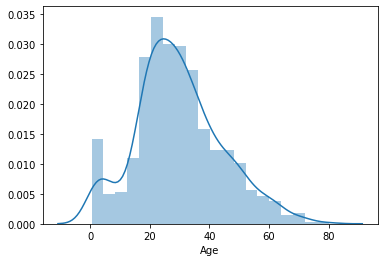

In [44]:
sns.distplot(df['Age'].dropna())

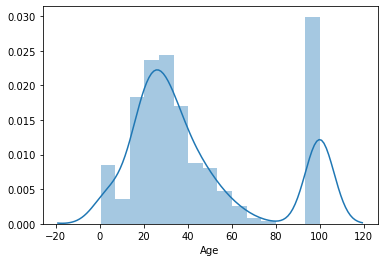

In [45]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of passenger')

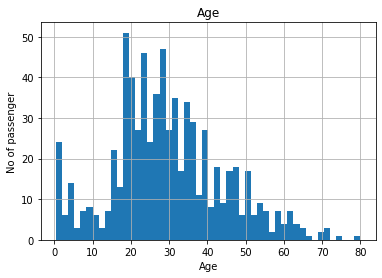

In [46]:
#Gaussian Distribution
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

In [47]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [48]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

if skewd feature

Text(0, 0.5, 'No of passenger')

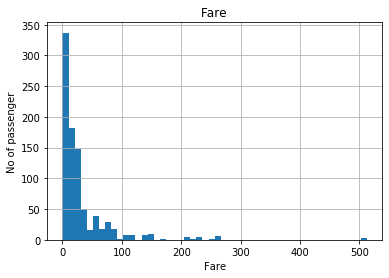

In [49]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [50]:
## Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [51]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [52]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [53]:
data=df.copy()
data.loc[data['Age']>=73,'Age']=73
data.loc[data['Fare']>=73,'Fare']=100

Text(0, 0.5, 'No of passenger')

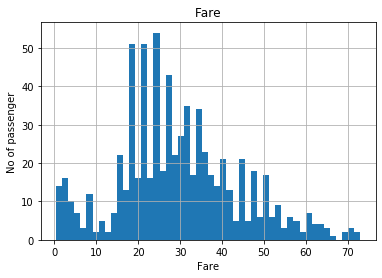

In [54]:

figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

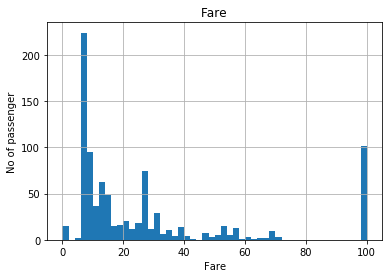

In [55]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [57]:

### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.7014925373134329
roc_auc_score: 0.7311106972123922


In [ ]:
#without outlier treatment

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Age','Fare']].fillna(0),df['Survived'],test_size=0.3)

In [59]:

### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6529850746268657
roc_auc_score: 0.6183630952380953
